# MSCOCO Subset

**Interesting tasks**
 - try mscoco on previous conv net

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils.data import Dataset

## Data

In [3]:
class data:
    train = Dataset('/data/mscoco/train_data.hdf', '/data/mscoco/train_imgs/', one_hot=False, norm=True)
    validation = Dataset('/data/mscoco/valid_data.hdf', '/data/mscoco/valid_imgs/', one_hot=False, norm=True)

class_id2class_name_mapping = {
    0: 'cow',
    1: 'sheep',
    2: 'giraffe',
    3: 'horse',
    4: 'bird',
    5: 'cat',
    6: 'dog',
    7: 'elephant',
    8: 'bear'}

## Examples Visualization

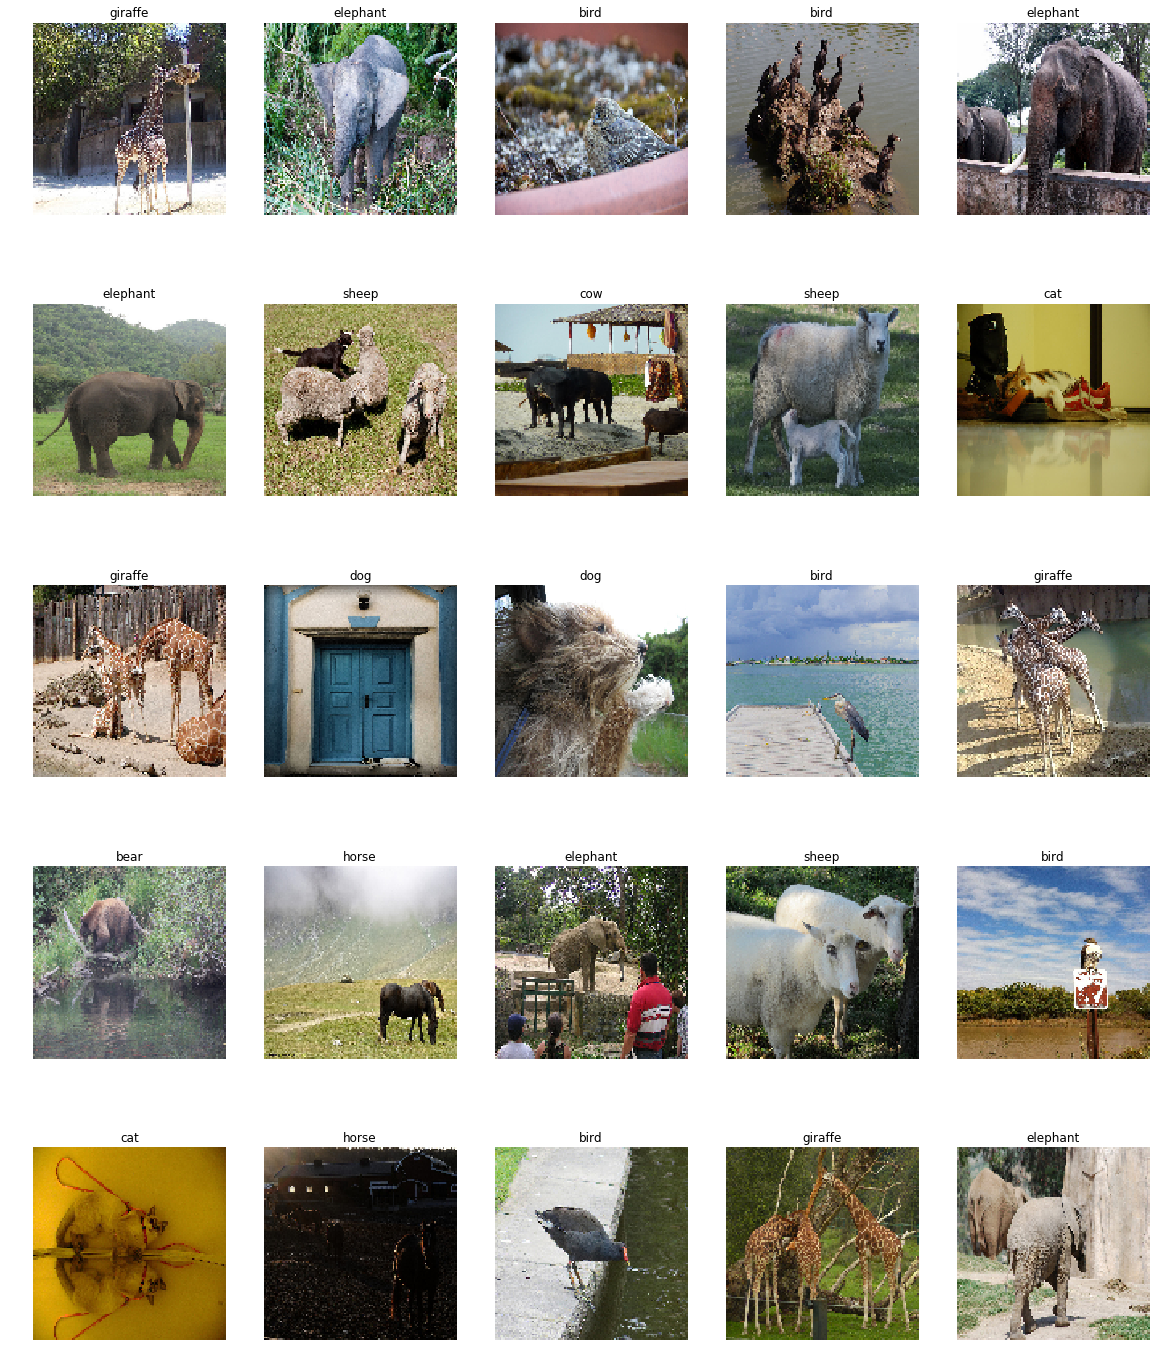

In [15]:
plt.subplots_adjust(wspace=1.5, hspace=2.5)
fig = plt.figure(figsize=(20,25))

image_shape = [120, 120, 3]
data.train.image_shape = image_shape
img_batch, label_batch = data.train.next_batch(batch_size=25)

for img_id in range(25):
    ax = plt.subplot(5, 5, img_id+1)
    
    img = img_batch[img_id]
    img = img.reshape(image_shape)
    class_id = label_batch[img_id]
    class_name = class_id2class_name_mapping[class_id]
    ax.imshow(img , cmap='gray')
    ax.set_title(class_name)
    ax.axes.set_axis_off()

## Distribution visualization 

In [26]:
_, labels = data.train.next_batch(100)
class_names = list(map(lambda class_id: class_id2class_name_mapping[class_id], labels))

data_frame = pd.DataFrame({'class_names':class_names, 'class_ids': labels})

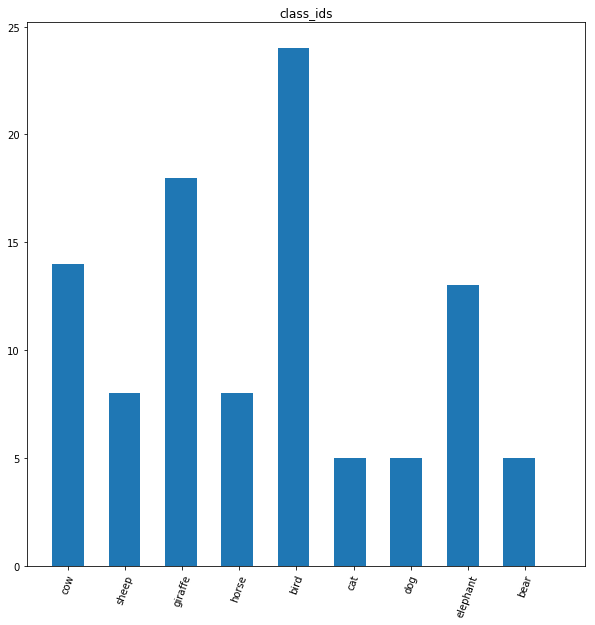

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = plt.gca()
data_frame.hist(column='class_ids', bins=9, grid=False, ax=ax, width=0.5)
_ = ax.xaxis.set_ticks(np.arange(0.25, 8, 0.9))
_ = ax.xaxis.set_ticklabels(list(class_id2class_name_mapping.values()), rotation=70)